In [26]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
def fc_matrix(ts):
    n = ts.shape[1]
    fc = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            fc[i, j] = np.corrcoef(ts[:, i], ts[:, j])[0, 1]
    return fc

In [43]:
def FCuCorrelation(FC1, FC2, fisher=True):
    """
    Computes the correlation between the upper triangular parts of two FC matrices.

    Parameters
    ----------
    FC1 : ndarray
        The first functional connectivity matrix (N, N).
    FC2 : ndarray
        The second functional connectivity matrix (N, N).
    fisher : bool, optional (default=True)
        If True, applies Fisher's z-transformation to the upper triangular elements.

    Returns
    -------
    float
        Pearson correlation between the upper triangular elements of FC1 and FC2.
    """
    u_idx = np.triu_indices_from(FC1, k=1)
    FCu1 = FC1.copy()[u_idx]
    FCu2 = FC2.copy()[u_idx]
    if fisher:
        FCu1 = np.arctanh(FCu1)
        FCu2 = np.arctanh(FCu2)
    FC_corr_upper = np.corrcoef(FCu1, FCu2)[0, 1]
    return FC_corr_upper

In [59]:
derivatives_dir = "Users/brainsimulation/Desktop/nmdare-data-fmriprep/derivatives/python"

In [35]:
import os

wb_command_dir = "/Users/brainsimulation/Desktop/nmdare-data-fmriprep/derivatives/wb_command"
subs = [d for d in os.listdir(wb_command_dir)]

['sub-LEGK011']


In [ ]:
for sub in subs:
    ts_fname = f"/Users/brainsimulation/Desktop/nmdare-data-fmriprep/derivatives/wb_command/{sub}/{sub}_task-rest_timeseries.ptseries.nii"

    time_series = nib.load(ts_fname).dataobj

    static_fc = fc_matrix(time_series)
    pd.DataFrame(static_fc).to_csv(os.path.join(derivatives_dir, sub, f"{sub}_static_fc.csv"))

    window_size = 40
    window_step = 5

    all_fcs = []
    for i in range(0, time_series.shape[0] - window_size, window_step):
        window_ts = time_series[i:i + window_size, :]

        fc = fc_matrix(window_ts)

        all_fcs.append(fc)

    n_fcs = len(all_fcs)

    FCD = np.zeros((n_fcs, n_fcs))
    for i in range(n_fcs):
        for j in range(n_fcs):
            FCD[i, j] = FCuCorrelation(all_fcs[i], all_fcs[j])
    
    pd.DataFrame(FCD).to_csv(os.path.join(derivatives_dir, sub, f"{sub}_FCD.csv"))
    
    fcd_flattened = FCD.flatten()
    hist = plt.hist(fcd_flattened, bins=100, range=(0, 1))
    plt.savefig(os.path.join(derivatives_dir, sub, "figs", f"{sub}_FCD_histogram.png"))
    bin_counts = hist[0]
    pd.DataFrame(bin_counts).to_csv(os.path.join(derivatives_dir, sub, f"{sub}_FCD_histogram_counts.csv"))

In [41]:
fc_fname = "/Users/brainsimulation/Desktop/nmdare-data-fmriprep/derivatives/wb_command/sub-LEGK011/sub-LEGK011_task-rest_boldmap.pconn.nii"
ts_fname = "/Users/brainsimulation/Desktop/nmdare-data-fmriprep/derivatives/wb_command/sub-LEGK011_task-rest_timeseries.ptseries.nii"

# time_series = nib.load(ts_fname)
time_series.shape

(260, 87)

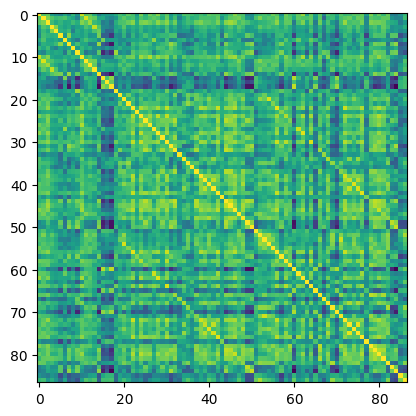

In [28]:
fc_wb = nib.load(fc_fname)
fc.shape
plt.imshow(fc.dataobj)

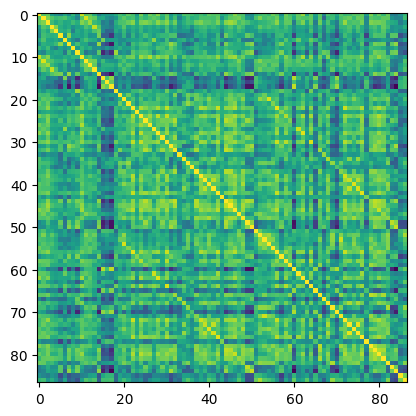

In [30]:
fc = fc_matrix(time_series.dataobj)
plt.imshow(fc)

In [31]:
time_series = time_series.dataobj

window_size = 40
window_step = 5

all_fcs = []
for i in range(0, time_series.shape[0] - window_size, window_step):
    window_ts = time_series[i:i + window_size, :]

    fc = fc_matrix(window_ts)

    all_fcs.append(fc)

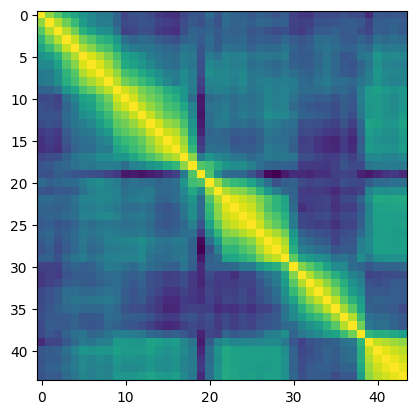

In [33]:
n_fcs = len(all_fcs)

FDC = np.zeros((n_fcs, n_fcs))
for i in range(n_fcs):
    for j in range(n_fcs):
        FDC[i, j] = FCuCorrelation(all_fcs[i], all_fcs[j])

plt.imshow(FDC)

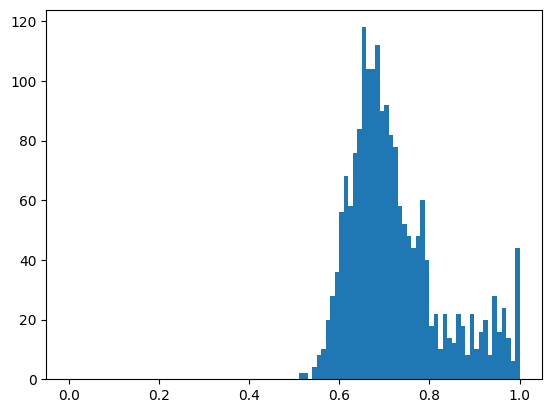

In [52]:
fcd_flattened = FDC.flatten()
hist = plt.hist(fcd_flattened, bins=100, range=(0, 1))